## now Handling to more complex Agent States

In [3]:
from langgraph.graph import StateGraph
from typing import TypedDict

In [4]:
class AgentState(TypedDict):
    values : list[int]
    name : str
    result : str

In [5]:
def process_values(state:AgentState)->AgentState:
    state["result"] = state["result"] + f"Hello!, parent of {state['name']}, your  child has scored = {sum(state['values'])} in the exam"
    return state

In [6]:
graph = StateGraph(AgentState)
graph.add_node("Give Result",process_values)
graph.set_entry_point("Give Result")
graph.set_finish_point("Give Result")
build = graph.compile()

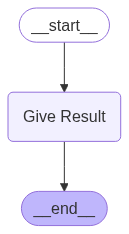

In [7]:
from IPython.display import display,Image
display(Image(build.get_graph().draw_mermaid_png()))

In [13]:
result = build.invoke({"values":[55,40,55,70],"name":"bob","result":""})
result['result']

'Hello!, parent of bob, your  child has scored = 220 in the exam'

## another one

In [15]:
from typing import Literal

In [22]:
class AgentState(TypedDict):
    values : list[int]
    name : str
    operation : Literal['+','*']
    result : str

In [23]:
from functools import reduce
from operator import mul

In [29]:
def process_values(state:AgentState)->AgentState:
    if state['operation'] == '+':
        state["result"] = state["result"] + f"Hello!, parent of {state['name']}, your  child has scored = {sum(state['values'])} in the exam."
    else:
        state["result"] = state["result"] + f"Hello!, parent of {state['name']}, your  child multiplied score = {reduce(mul,(state['values']))} in the exam."
    return state

In [30]:
graph = StateGraph(AgentState)
graph.add_node("Give Result",process_values)
graph.set_entry_point("Give Result")
graph.set_finish_point("Give Result")
build = graph.compile()

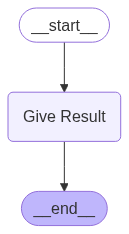

In [31]:
from IPython.display import display,Image
display(Image(build.get_graph().draw_mermaid_png()))

In [32]:
result = build.invoke({"values":[55,40,55,70],"name":"bob","operation":'*',"result":""})
result['result']

'Hello!, parent of bob, your  child multiplied score = 8470000 in the exam.'